# SNLP Assignment 1

Name 1: Aleksey Morshnev<br/>
Student id 1: 7042691<br/>
Email 1: almo00008@stud.uni-saarland.de<br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1 (7 = 2+2+0.25+0.25+0.5+1+1 points)

You are given the subfolder `data`, which contains 4 files:
- `alice_eng.txt` contains the text of Alice's Adventures in Wonderland by Lewis Carroll (source: https://www.gutenberg.org/ebooks/19033).
- `alice_ger.txt` contains the translation of Alice's Adventures in Wonderland into German (source: https://www.gutenberg.org/ebooks/19778).
- `trainer.py` contains the Python code of Transformer's trainer module by Huggingface (source: https://github.com/huggingface/transformers/blob/v4.40.1/src/transformers/trainer.py#L277).
- `uniprot_sprot.fasta` contains sequences of amino acids, forming proteins (source: https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.fasta.gz). If you are interested, you can look up the meaning of the letters inside the file here: https://en.wikipedia.org/wiki/Protein_sequence

---

We provide you with some code that loads the data and tokenizes the text (such that you receive a list of words). Your task is to implement the functions `analysis_linear` and `analysis_loglog`, as well as answer the questions.


### 1. Linear Plot for `alice_eng.txt` (2 points)
- (1.1) Count how many times each word occurs (raw frequencies) in `alice_eng.txt`, then rank the words, such that highest frequency has rank 1 and so on. For each of the words, plot the frequency against the rank. Use a plot with linear axes. (2 points)

In [11]:
# your code goes here!
# TODO:

def analysis_linear(name, data):
    """
    Plot frequency against rank linearly
    
    :param name: title of the graph
    :param data: list of words
    """
    import matplotlib.pyplot as plt
    import numpy as np

    
    #count the frequency of each word
    word_freq = {}
    for word in data:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    # sort the words by frequency
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    # plot the graph
    plt.figure(figsize=(10, 5))
    plt.plot([x[1] for x in sorted_word_freq])
    plt.xscale('linear')
    plt.yscale('linear')
    plt.title(name)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.show()
    
    return

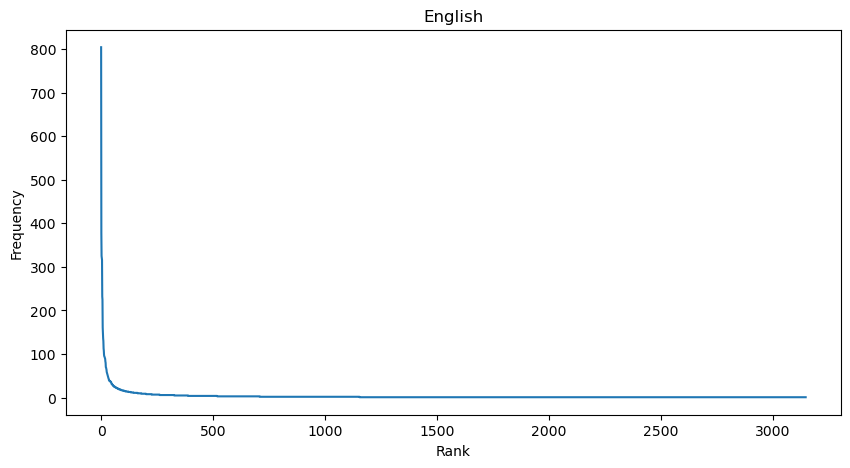

In [12]:
# run on English text, linear axes
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_linear("English", f.read().lower().split())


### 2. Log-log Plots (3 points)
- (2.1) Now do this for all of the 4 files, but use the log-log scale for your plots. (2 = (5 * 0.5) points)
- (2.2) Why is it better to use a log-log scale? (0.25 points)
- (2.3) In your plot, what causes the vertical gaps ("steps") for high-rank words (rightmost)? (0.25 points)
- (2.4) What are the differences between the languages? What causes them? (0.5 points)

### 3. Zipf's Law (2 points)
- (3.1) Zipf's law "predicts" the frequency of the n-th rank word. Add an 'ideal' line to your 4 plots, according to Zipf's law. Use the following formula. (1 point)

$$\hat{y}_i = \frac{\text{frequency of }word_{rank1}} {\text{rank of } word_i}$$

- (3.2) Compute the mean squared error (MSE) of these predictions, and output the value to 10 decimal digits. (1 point)

$$ MSE = \big(\frac{1}{n} \sum (\hat{y}_i - y_i)^2\big)$$

---

### Your answers to questions (2.2-4) go here!
---

2.2 It is better to use a log-log scale because it is easier to display data with large difference in values such as word frequencies vs rank.

2.3 Steps for high-rank words are cause by 2 factors - first of all, the lower the frequency - the more words have same rank -- this causes plot to draw a horizontal line. Secondly, since it's a log scale and values are quite small for low frequencies - we can see that change from 1 to 2 frequency makes plot draw a big vertical line. These two reasons explain "steps" effect at the rightmost side of a plot.

Source: wikipedia page, Hapax legomenon https://en.wikipedia.org/wiki/Hapax_legomenon

2.4 For natural languages:

In german the most frequent word is "sie" with 815 occurances while in english it's "the" with 804 occurances.
"sie" occurs so often because it has many meanings, for example: "she", "they", "them", "her", but also, since we made all words lowercase, we merge two different words: "Sie" and "sie". In addition to already mentioned translations, now "sie" also got counted for: "you". That's why it got to the first place.
On the other hand, english word "the" in german text got distilled into different words: "die", "der", "das". That's because German language has grammatical gender system which assignes nouns to gender categories.

Difference between natural langauges and formal/descriptive is that natural language does not seem to be below ideal zipf line any time except for low ranks, which is not the case for formal/descriptive. The latter ones seem to fall far below the ideal zipf line. That is completely ok since zipf's law is for natural languages.

Source: wikipedia page, Zipf's law https://en.wikipedia.org/wiki/Zipf%27s_law

In [51]:
# your code for 2. and 3. goes here!
# TODO:

def analysis_loglog(name, data):
    """
    Plot Zipfian distribution of words + ideal Zipfian distribution on a loglog scale.
    Compute and print out MSE.

    :param name: title of the graph
    :param data: list of words
    """
    import matplotlib.pyplot as plt
    import numpy as np

    
    #count the frequency of each word
    word_freq = {}
    for word in data:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    # sort the words by frequency
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    print(sorted_word_freq)

    # 3.1 Add ideal Zipfian distribution using y_i = f_i / rank_i
    ideal_zipf = [sorted_word_freq[0][1] / (i+1) for i in range(len(sorted_word_freq))]

    # 3.2 Compute and print out MSE
    mse = np.mean([(sorted_word_freq[i][1] - ideal_zipf[i])**2 for i in range(len(sorted_word_freq))])
    print(f"{mse:.10f}")
    
    # plot the graph
    plt.figure(figsize=(10, 5))
    plt.plot([x[1] for x in sorted_word_freq], label="Actual")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    # add ideal_zipf to the graph
    plt.plot(ideal_zipf, label="Ideal Zipf")
    plt.legend(loc='best')
    plt.show()
    
    return

[('the', 804), ('and', 377), ('a', 325), ('to', 320), ('of', 316), ('she', 232), ('in', 225), ('was', 161), ('you', 146), ('it', 136), ('said', 130), ('with', 113), ('or', 108), ('alice', 98), ('as', 95), ('her', 94), ('that', 92), ('at', 91), ('i', 89), ('project', 83), ('this', 80), ('for', 70), ('all', 69), ('on', 67), ('had', 64), ('not', 59), ('little', 57), ('gutenberg™', 54), ('be', 53), ('by', 52), ('is', 48), ('any', 48), ('out', 45), ('down', 44), ('if', 43), ('about', 40), ('very', 39), ('into', 39), ('up', 39), ('they', 38), ('work', 38), ('but', 37), ('when', 37), ('are', 36), ('do', 36), ('so', 35), ('like', 32), ('one', 32), ('no', 31), ('from', 31), ('were', 30), ('alice,', 29), ('"i', 29), ('your', 29), ('alice.', 27), ('electronic', 27), ('other', 26), ('there', 26), ('then', 26), ('gutenberg', 25), ('have', 25), ('came', 25), ('which', 25), ('its', 24), ('just', 24), ('an', 23), ('could', 23), ('he', 23), ('works', 23), ('terms', 22), ('[illustration]', 22), ('what',

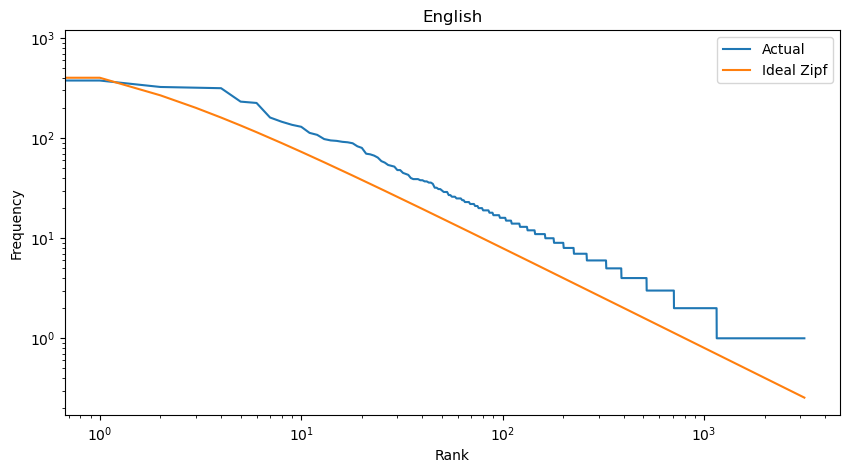

[('sie', 815), ('und', 762), ('die', 665), ('der', 500), ('zu', 414), ('es', 354), ('sagte', 344), ('ich', 338), ('in', 333), ('das', 316), ('nicht', 280), ('sich', 248), ('alice', 238), ('so', 218), ('den', 212), ('mit', 208), ('ein', 197), ('the', 187), ('--', 175), ('daß', 165), ('ist', 158), ('dem', 151), ('du', 151), ('war', 147), ('ihr', 145), ('wie', 144), ('auf', 135), ('von', 128), ('»ich', 128), ('of', 123), ('aber', 122), ('als', 117), ('eine', 117), ('er', 111), ('sehr', 97), ('an', 96), ('da', 91), ('was', 86), ('project', 84), ('wenn', 84), ('to', 78), ('ganz', 77), ('noch', 76), ('or', 74), ('you', 73), ('wieder', 73), ('einen', 73), ('alice,', 69), ('um', 69), ('and', 67), ('etwas', 67), ('einem', 65), ('nur', 59), ('mir', 58), ('hatte', 57), ('denn', 57), ('dachte', 57), ('a', 56), ('für', 55), ('alle', 55), ('»es', 55), ('gutenberg™', 54), ('ihre', 53), ('sprach', 51), ('nach', 50), ('dann', 50), ('alice.', 48), ('with', 47), ('»und', 47), ('viel', 47), ('königin', 46

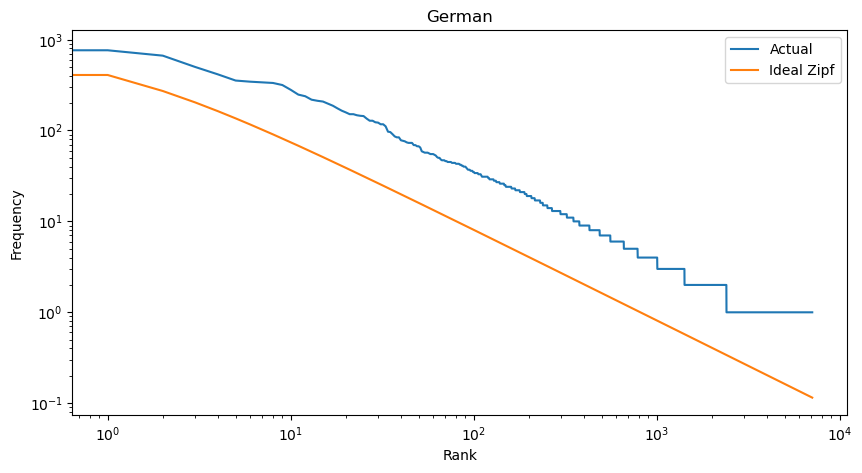

[('.', 2747), ('\n', 1704), ('(', 1519), (')', 1519), (',', 1183), ('self', 1117), ('=', 1112), (':', 1004), ('if', 575), ('args', 419), ('None', 307), ('[', 286), (']', 286), ('model', 255), ('not', 215), ('else', 178), ('is', 174), ('and', 128), ('torch', 120), ('os', 107), ('state', 106), ('path', 105), ('in', 103), ('return', 98), ('import', 96), ('output_dir', 88), ('def', 86), ('==', 77), ('logger', 74), ('0', 74), ('str', 68), ('metrics', 63), ('join', 63), ('from', 62), ('True', 62), ('False', 61), ('elif', 61), ('raise', 59), ('for', 56), ('optimizer', 55), ('{', 51), ('}', 51), ('isinstance', 50), ('accelerator', 49), ('1', 47), ('state_dict', 47), ('resume_from_checkpoint', 47), ('Optional', 46), ('or', 46), ('ValueError', 45), ('info', 44), ('trial', 41), ('inputs', 41), ('device', 38), ('control', 38), ('OptimizerNames', 37), ('eval_dataset', 36), ('**', 35), ('optim', 34), ('checkpoint', 34), ('is_sagemaker_mp_enabled', 30), ('lr_scheduler', 30), ('max_steps', 30), ('data

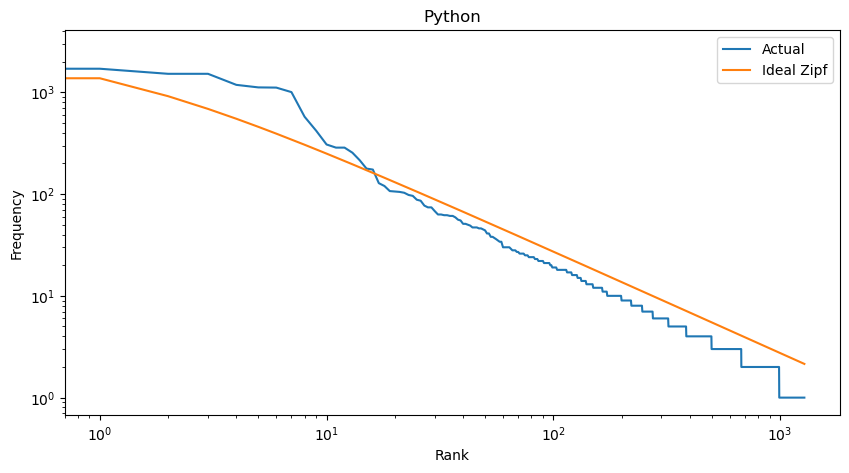

[('L', 19944973), ('A', 17063201), ('G', 14620202), ('V', 14173364), ('E', 13888872), ('S', 13753991), ('I', 12215980), ('K', 11992179), ('R', 11428075), ('D', 11289672), ('T', 11085131), ('P', 9807074), ('N', 8397614), ('Q', 8126881), ('F', 7995342), ('Y', 6041636), ('M', 4986954), ('H', 4709491), ('C', 2867266), ('W', 2281571), ('X', 8044), ('U', 329), ('B', 276), ('Z', 249), ('O', 29)]
44090518932084.7343750000


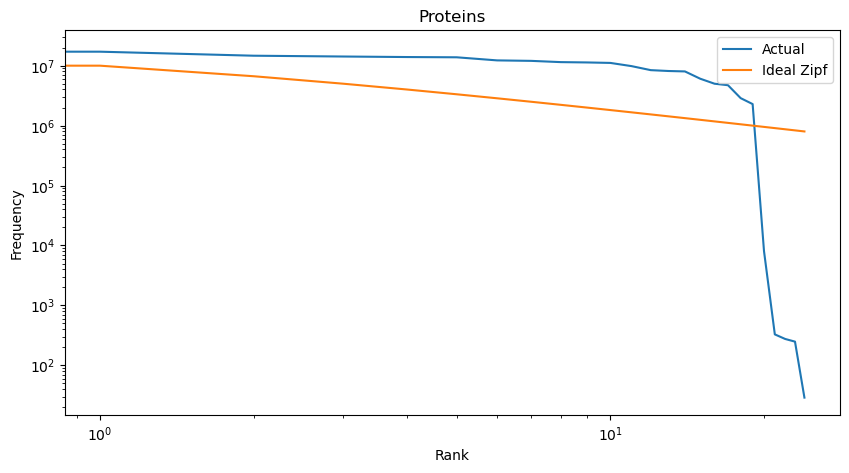

In [52]:
import tokenize

# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_loglog("English", f.read().lower().split())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_loglog("German", f.read().lower().split())

# run on Transformer's trainer module's source code, log-log scale
with open("data/trainer.py", "r", encoding="utf-8") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    analysis_loglog("Python", tokens)
    
# run on Uniprot's protein data, log-log scale
with open("data/uniprot_sprot.fasta", "r", encoding="utf-8-sig") as f:
    proteins = []
    for line in f:
        if line.startswith(">"):
            continue
        proteins.append(line.strip())
    proteins_long = ''.join(proteins)
    analysis_loglog("Proteins", [*proteins_long])

## Bonus (3 = 1+0.5+0.5+1 points)

For these exercises, please use your own loaders similar to the ones we provided.

##### Bonus 1:
- Add another 'ideal' curve to your 4 plots, but use the Mandelbrot formula instead (lecture slides chapter_2 page 19). You should play around with the parameters a little bit, but it's not necessary to achieve a perfect fit for every plot. (1 point)

[('the', 804), ('and', 377), ('a', 325), ('to', 320), ('of', 316), ('she', 232), ('in', 225), ('was', 161), ('you', 146), ('it', 136), ('said', 130), ('with', 113), ('or', 108), ('alice', 98), ('as', 95), ('her', 94), ('that', 92), ('at', 91), ('i', 89), ('project', 83), ('this', 80), ('for', 70), ('all', 69), ('on', 67), ('had', 64), ('not', 59), ('little', 57), ('gutenberg™', 54), ('be', 53), ('by', 52), ('is', 48), ('any', 48), ('out', 45), ('down', 44), ('if', 43), ('about', 40), ('very', 39), ('into', 39), ('up', 39), ('they', 38), ('work', 38), ('but', 37), ('when', 37), ('are', 36), ('do', 36), ('so', 35), ('like', 32), ('one', 32), ('no', 31), ('from', 31), ('were', 30), ('alice,', 29), ('"i', 29), ('your', 29), ('alice.', 27), ('electronic', 27), ('other', 26), ('there', 26), ('then', 26), ('gutenberg', 25), ('have', 25), ('came', 25), ('which', 25), ('its', 24), ('just', 24), ('an', 23), ('could', 23), ('he', 23), ('works', 23), ('terms', 22), ('[illustration]', 22), ('what',

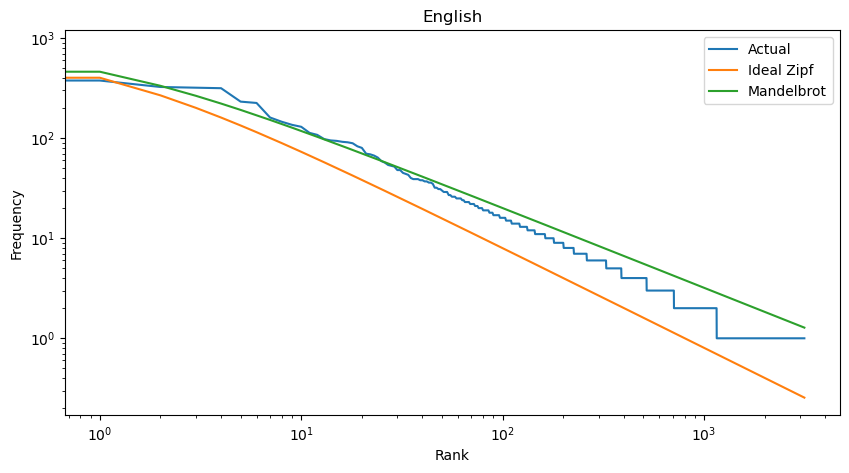

[('sie', 815), ('und', 762), ('die', 665), ('der', 500), ('zu', 414), ('es', 354), ('sagte', 344), ('ich', 338), ('in', 333), ('das', 316), ('nicht', 280), ('sich', 248), ('alice', 238), ('so', 218), ('den', 212), ('mit', 208), ('ein', 197), ('the', 187), ('--', 175), ('daß', 165), ('ist', 158), ('dem', 151), ('du', 151), ('war', 147), ('ihr', 145), ('wie', 144), ('auf', 135), ('von', 128), ('»ich', 128), ('of', 123), ('aber', 122), ('als', 117), ('eine', 117), ('er', 111), ('sehr', 97), ('an', 96), ('da', 91), ('was', 86), ('project', 84), ('wenn', 84), ('to', 78), ('ganz', 77), ('noch', 76), ('or', 74), ('you', 73), ('wieder', 73), ('einen', 73), ('alice,', 69), ('um', 69), ('and', 67), ('etwas', 67), ('einem', 65), ('nur', 59), ('mir', 58), ('hatte', 57), ('denn', 57), ('dachte', 57), ('a', 56), ('für', 55), ('alle', 55), ('»es', 55), ('gutenberg™', 54), ('ihre', 53), ('sprach', 51), ('nach', 50), ('dann', 50), ('alice.', 48), ('with', 47), ('»und', 47), ('viel', 47), ('königin', 46

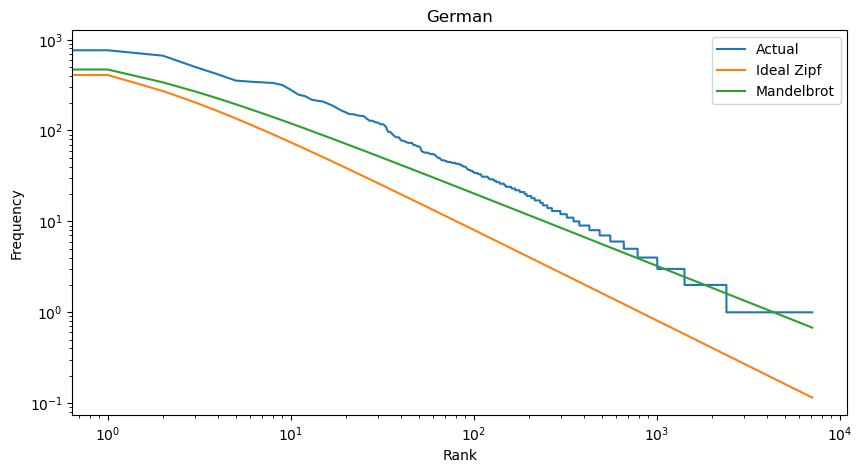

[('.', 2747), ('\n', 1704), ('(', 1519), (')', 1519), (',', 1183), ('self', 1117), ('=', 1112), (':', 1004), ('if', 575), ('args', 419), ('None', 307), ('[', 286), (']', 286), ('model', 255), ('not', 215), ('else', 178), ('is', 174), ('and', 128), ('torch', 120), ('os', 107), ('state', 106), ('path', 105), ('in', 103), ('return', 98), ('import', 96), ('output_dir', 88), ('def', 86), ('==', 77), ('logger', 74), ('0', 74), ('str', 68), ('metrics', 63), ('join', 63), ('from', 62), ('True', 62), ('False', 61), ('elif', 61), ('raise', 59), ('for', 56), ('optimizer', 55), ('{', 51), ('}', 51), ('isinstance', 50), ('accelerator', 49), ('1', 47), ('state_dict', 47), ('resume_from_checkpoint', 47), ('Optional', 46), ('or', 46), ('ValueError', 45), ('info', 44), ('trial', 41), ('inputs', 41), ('device', 38), ('control', 38), ('OptimizerNames', 37), ('eval_dataset', 36), ('**', 35), ('optim', 34), ('checkpoint', 34), ('is_sagemaker_mp_enabled', 30), ('lr_scheduler', 30), ('max_steps', 30), ('data

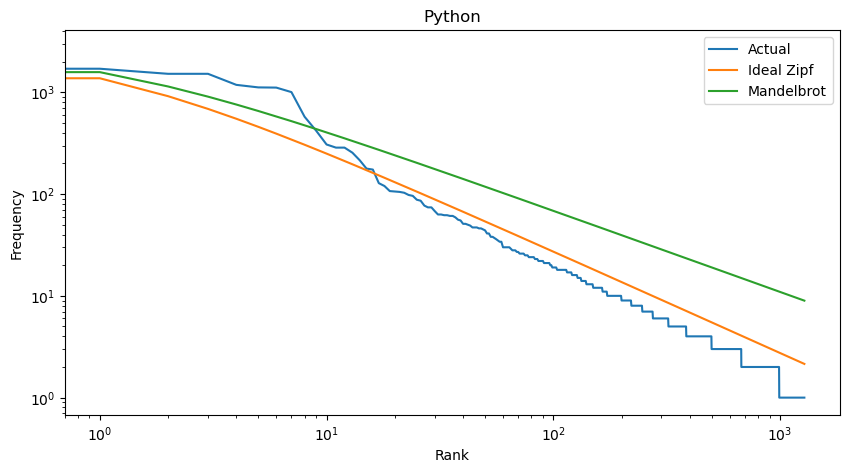

[('L', 19944973), ('A', 17063201), ('G', 14620202), ('V', 14173364), ('E', 13888872), ('S', 13753991), ('I', 12215980), ('K', 11992179), ('R', 11428075), ('D', 11289672), ('T', 11085131), ('P', 9807074), ('N', 8397614), ('Q', 8126881), ('F', 7995342), ('Y', 6041636), ('M', 4986954), ('H', 4709491), ('C', 2867266), ('W', 2281571), ('X', 8044), ('U', 329), ('B', 276), ('Z', 249), ('O', 29)]
Ideal Zipf's MSE: 44090518932084.7343750000
Mandelbrot's MSE: 32133787077750.2304687500


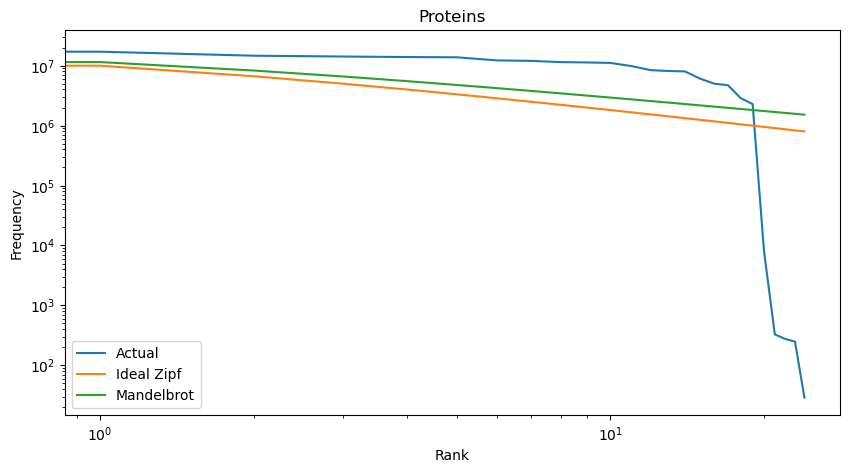

In [53]:
# your code for 2. and 3. goes here!
# TODO:

def analysis_loglog(name, data):
    """
    Plot Zipfian distribution of words + ideal Zipfian distribution on a loglog scale.
    Compute and print out MSE.

    :param name: title of the graph
    :param data: list of words
    """
    import matplotlib.pyplot as plt
    import numpy as np

    
    #count the frequency of each word
    word_freq = {}
    for word in data:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    # sort the words by frequency
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    print(sorted_word_freq)

    # 3.1 Add ideal Zipfian distribution using y_i = f_i / rank_i
    ideal_zipf = [sorted_word_freq[0][1] / (i+1) for i in range(len(sorted_word_freq))]

    # 3.2 Compute and print out MSE
    mse = np.mean([(sorted_word_freq[i][1] - ideal_zipf[i])**2 for i in range(len(sorted_word_freq))])
    print(f"Ideal Zipf's MSE: {mse:.10f}")

    # Bonus 1: Add Mandelbrot formula
    # formula is: C / ((rank + P)**d)
    C = sorted_word_freq[0][1]
    P = 0
    d = 0.80
    mandelbrot = [C / ((i+1 + P)**d) for i in range(len(sorted_word_freq))]

    mse_mandelbrot = np.mean([(sorted_word_freq[i][1] - mandelbrot[i])**2 for i in range(len(sorted_word_freq))])
    print(f"Mandelbrot's MSE: {mse_mandelbrot:.10f}")
    
    # plot the graph
    plt.figure(figsize=(10, 5))
    plt.plot([x[1] for x in sorted_word_freq], label="Actual")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    # add ideal_zipf to the graph
    plt.plot(ideal_zipf, label="Ideal Zipf")
    # add mandelbrot to the graph
    plt.plot(mandelbrot, label="Mandelbrot")
    plt.legend(loc='best')
    plt.show()
    
    return

import tokenize

# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_loglog("English", f.read().lower().split())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_loglog("German", f.read().lower().split())

# run on Transformer's trainer module's source code, log-log scale
with open("data/trainer.py", "r", encoding="utf-8") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    analysis_loglog("Python", tokens)
    
#run on Uniprot's protein data, log-log scale
with open("data/uniprot_sprot.fasta", "r", encoding="utf-8-sig") as f:
    proteins = []
    for line in f:
        if line.startswith(">"):
            continue
        proteins.append(line.strip())
    proteins_long = ''.join(proteins)
    analysis_loglog("Proteins", [*proteins_long])

##### Bonus 2: run these two experiments for both of the `alice` texts (independent of each other) like you did in the main exercises:
- (Bonus 2.1) Don't lowercase anything. (0.5 points)
- (Bonus 2.2) Use character level tokenization, rather than word level. (0.5 points)

You don't have to include the Mandelbrot function here.

[('the', 742), ('and', 360), ('a', 321), ('to', 313), ('of', 303), ('in', 214), ('she', 197), ('was', 161), ('said', 129), ('you', 127), ('it', 122), ('with', 111), ('or', 102), ('Alice', 98), ('her', 92), ('as', 89), ('I', 89), ('that', 89), ('at', 83), ('Project', 79), ('this', 67), ('all', 67), ('on', 65), ('had', 64), ('for', 62), ('not', 57), ('little', 56), ('Gutenberg™', 53), ('be', 52), ('The', 52), ('by', 49), ('is', 48), ('out', 45), ('down', 44), ('any', 44), ('into', 39), ('up', 39), ('about', 39), ('very', 38), ('work', 37), ('are', 36), ('She', 35), ('they', 34), ('but', 32), ('when', 32), ('like', 32), ('one', 32), ('do', 31), ('were', 30), ('from', 30), ('Alice,', 29), ('"I', 29), ('no', 28), ('so', 27), ('Alice.', 27), ('electronic', 27), ('if', 26), ('other', 25), ('came', 25), ('your', 25), ('have', 24), ('its', 24), ('which', 24), ('could', 23), ('works', 23), ('Gutenberg', 22), ('[Illustration]', 22), ('what', 21), ('large', 21), ('went', 21), ('an', 21), ('terms',

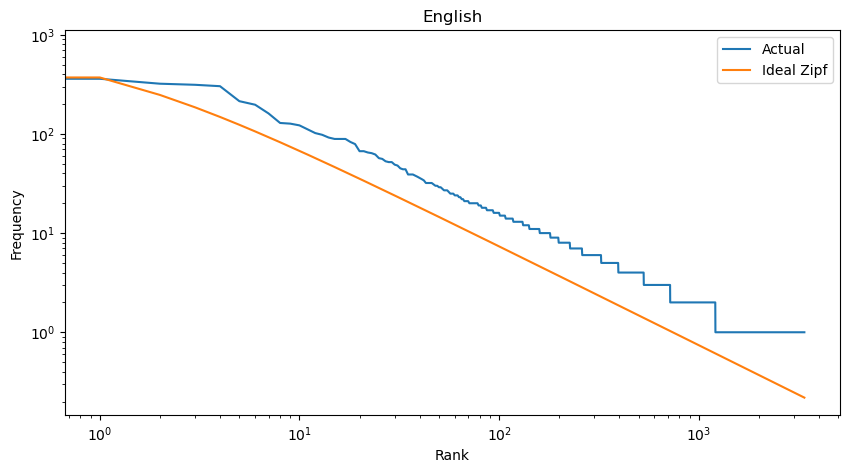

[('sie', 729), ('und', 720), ('die', 619), ('der', 468), ('zu', 412), ('sagte', 344), ('in', 324), ('es', 323), ('ich', 301), ('das', 285), ('nicht', 279), ('sich', 247), ('Alice', 238), ('den', 208), ('so', 204), ('mit', 202), ('ein', 191), ('--', 175), ('the', 170), ('daß', 163), ('ist', 157), ('dem', 150), ('war', 147), ('du', 147), ('ihr', 139), ('auf', 133), ('wie', 129), ('von', 127), ('eine', 115), ('of', 112), ('als', 106), ('aber', 106), ('er', 102), ('»Ich', 99), ('sehr', 97), ('an', 96), ('Sie', 86), ('was', 82), ('da', 81), ('Project', 80), ('wenn', 79), ('ganz', 76), ('noch', 75), ('wieder', 73), ('to', 72), ('Alice,', 69), ('um', 69), ('einen', 69), ('or', 68), ('and', 66), ('etwas', 66), ('einem', 64), ('hatte', 57), ('dachte', 57), ('mir', 57), ('nur', 57), ('a', 56), ('you', 55), ('für', 54), ('denn', 53), ('Gutenberg™', 53), ('ihre', 51), ('sprach', 50), ('Alice.', 48), ('dann', 47), ('with', 46), ('Die', 46), ('Königin', 46), ('fing', 46), ('viel', 46), ('falsche', 4

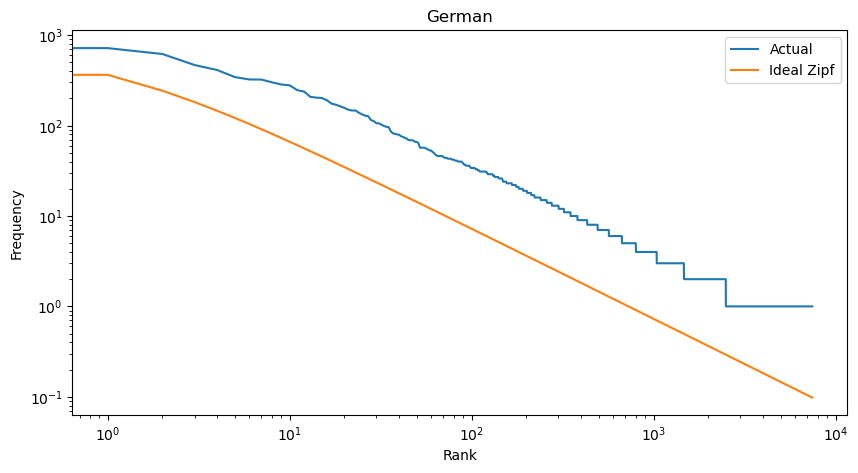

In [58]:
# your code for Bonus 2.1 goes here!
# TODO:

def analysis_loglog(name, data):
    """
    Plot Zipfian distribution of words + ideal Zipfian distribution on a loglog scale.
    Compute and print out MSE.

    :param name: title of the graph
    :param data: list of words
    """
    import matplotlib.pyplot as plt
    import numpy as np

    
    #count the frequency of each word
    word_freq = {}
    for word in data:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    # sort the words by frequency
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    print(sorted_word_freq)

    # 3.1 Add ideal Zipfian distribution using y_i = f_i / rank_i
    ideal_zipf = [sorted_word_freq[0][1] / (i+1) for i in range(len(sorted_word_freq))]

    # 3.2 Compute and print out MSE
    mse = np.mean([(sorted_word_freq[i][1] - ideal_zipf[i])**2 for i in range(len(sorted_word_freq))])
    print(f"{mse:.10f}")
    
    # plot the graph
    plt.figure(figsize=(10, 5))
    plt.plot([x[1] for x in sorted_word_freq], label="Actual")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    # add ideal_zipf to the graph
    plt.plot(ideal_zipf, label="Ideal Zipf")
    plt.legend(loc='best')
    plt.show()
    
    return

# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_loglog("English", f.read().split())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_loglog("German", f.read().split())

[(' ', 12453), ('e', 6905), ('t', 5378), ('a', 4417), ('o', 4381), ('i', 3901), ('n', 3657), ('r', 3264), ('h', 3223), ('s', 3221), ('d', 2367), ('l', 2298), ('\n', 1699), ('u', 1696), ('c', 1542), ('g', 1358), ('w', 1285), ('f', 1145), ('m', 1081), ('y', 1060), ('p', 980), (',', 924), ('b', 802), ('"', 688), ('.', 627), ('k', 557), ('v', 411), ("'", 258), ('-', 222), ('!', 176), ('_', 150), ('j', 144), ('q', 96), (';', 78), ('x', 74), ('?', 70), ('1', 59), ('™', 57), (':', 33), ('z', 33), ('(', 30), (')', 30), ('[', 27), (']', 27), ('0', 19), ('*', 17), ('3', 13), ('“', 11), ('”', 11), ('/', 10), ('2', 9), ('6', 9), ('9', 9), ('8', 9), ('5', 9), ('4', 8), ('’', 6), ('7', 4), ('•', 4), ('&', 3), ('—', 2), ('$', 2), ('\ufeff', 1), ('#', 1), ('ù', 1), ('%', 1), ('‘', 1)]
492770.4468700972


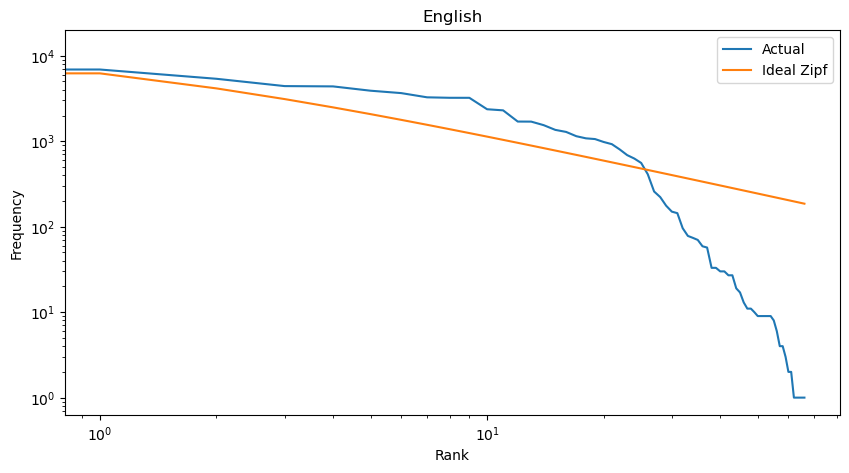

[(' ', 28762), ('e', 21802), ('n', 12732), ('i', 11699), ('s', 8782), ('r', 8781), ('a', 8723), ('t', 8339), ('h', 7676), ('d', 6473), ('c', 5399), ('u', 5118), ('l', 5027), ('\n', 4093), ('g', 4083), ('o', 3756), ('m', 3181), ('w', 2843), (',', 2795), ('f', 2342), ('b', 2195), ('k', 1883), ('z', 1502), ('.', 1275), ('p', 1179), ('»', 1085), ('«', 1080), ('v', 796), ('ü', 669), ('ß', 618), ('ö', 608), ('ä', 557), ('-', 502), ('!', 463), ('y', 351), ('j', 294), (';', 275), (':', 229), ('?', 212), ('_', 194), ("'", 142), ('1', 74), ('(', 69), (')', 69), ('™', 57), ('[', 44), (']', 44), ('q', 36), ('x', 36), ('*', 27), ('0', 22), ('3', 16), ('2', 15), ('8', 14), ('5', 13), ('9', 12), ('6', 11), ('4', 11), ('“', 11), ('”', 11), ('7', 10), ('/', 10), ('"', 6), ('’', 6), ('•', 4), ('=', 2), ('—', 2), ('$', 2), ('\ufeff', 1), ('#', 1), ('ù', 1), ('&', 1), ('%', 1), ('‘', 1)]
3256386.8439529822


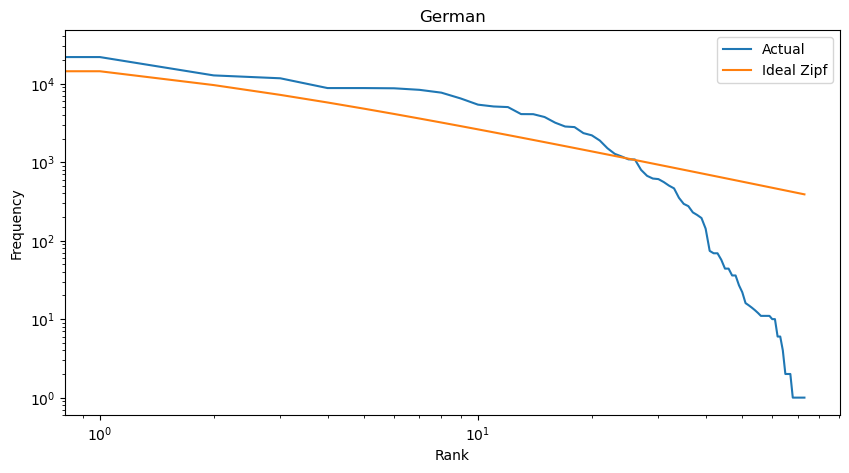

In [59]:
# your code for Bonus 2.2 goes here!
# TODO:

def analysis_loglog(name, data):
    """
    Plot Zipfian distribution of words + ideal Zipfian distribution on a loglog scale.
    Compute and print out MSE.

    :param name: title of the graph
    :param data: list of words
    """
    import matplotlib.pyplot as plt
    import numpy as np

    
    #count the frequency of each word
    word_freq = {}
    for word in data:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    # sort the words by frequency
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    print(sorted_word_freq)

    # 3.1 Add ideal Zipfian distribution using y_i = f_i / rank_i
    ideal_zipf = [sorted_word_freq[0][1] / (i+1) for i in range(len(sorted_word_freq))]

    # 3.2 Compute and print out MSE
    mse = np.mean([(sorted_word_freq[i][1] - ideal_zipf[i])**2 for i in range(len(sorted_word_freq))])
    print(f"{mse:.10f}")
    
    # plot the graph
    plt.figure(figsize=(10, 5))
    plt.plot([x[1] for x in sorted_word_freq], label="Actual")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    # add ideal_zipf to the graph
    plt.plot(ideal_zipf, label="Ideal Zipf")
    plt.legend(loc='best')
    plt.show()
    
    return

# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_loglog("English", list(f.read().lower()))

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_loglog("German", list(f.read().lower()))

##### Bonus 3:
- Use NLTK's corpora and download the `Brown corpus` corpus (id: "brown") and create a plot like you did before. (1 point)

In [69]:
#install nltk using conda
!conda install -y nltk

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.4.0



# All requested packages already installed.



[nltk_data] Downloading package brown to /home/reni/nltk_data...
[nltk_data]   Package brown is already up-to-date!


['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
[('the', 69971), (',', 58334), ('.', 49346), ('of', 36412), ('and', 28853), ('to', 26158), ('a', 23195), ('in', 21337), ('that', 10594), ('is', 10109), ('was', 9815), ('he', 9548), ('for', 9489), ('``', 8837), ("''", 8789), ('it', 8760), ('with', 7289), ('as', 7253), ('his', 6996), ('on', 6741), ('be', 6377), (';', 5566), ('at', 5372), ('by', 5306), ('i', 5164), ('this', 5145), ('had', 5133), ('?', 4693), ('not', 4610), ('are', 4394), ('but', 4381), ('from', 4370), ('or', 4206), ('have', 3942), ('an', 3740), ('they', 3620), ('which', 3561), ('--', 3432), ('one', 3292), ('you', 3286), ('were', 3284), ('her', 3036), ('all', 3001), ('she', 2860), ('there', 2728), ('would', 2714), ('their', 2669), ('we', 2652), ('him', 2619), ('been', 2472), (')', 2466), ('has', 2437), ('(', 2435), ('when', 2331), ('who', 2252),

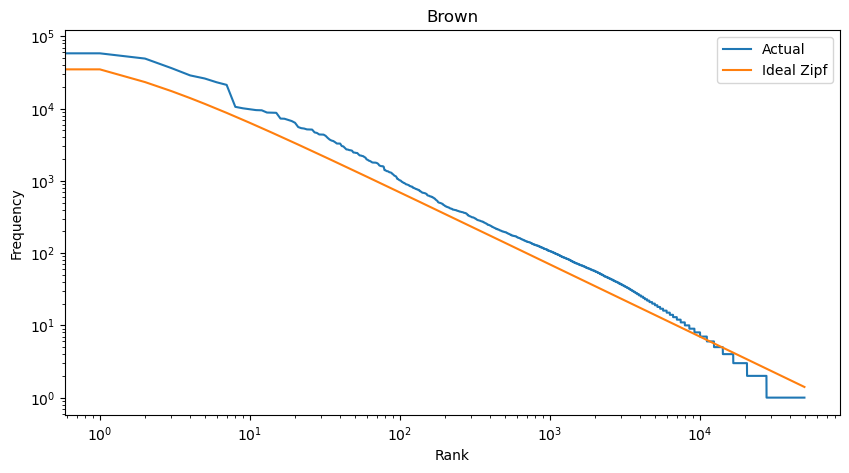

In [70]:
# your code for Bonus 3 goes here!
# TODO:

import nltk
nltk.download('brown')

from nltk.corpus import brown
print(brown.categories())

def analysis_loglog(name, data):
    """
    :param name: title of the graph
    :param data: list of words
    """
    import matplotlib.pyplot as plt
    import numpy as np

    
    #count the frequency of each word
    word_freq = {}
    for word in data:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    # sort the words by frequency
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    print(sorted_word_freq)

    # 3.1 Add ideal Zipfian distribution using y_i = f_i / rank_i
    ideal_zipf = [sorted_word_freq[0][1] / (i+1) for i in range(len(sorted_word_freq))]

    # 3.2 Compute and print out MSE
    mse = np.mean([(sorted_word_freq[i][1] - ideal_zipf[i])**2 for i in range(len(sorted_word_freq))])
    print(f"{mse:.10f}")
    
    # plot the graph
    plt.figure(figsize=(10, 5))
    plt.plot([x[1] for x in sorted_word_freq], label="Actual")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    # add ideal_zipf to the graph
    plt.plot(ideal_zipf, label="Ideal Zipf")
    plt.legend(loc='best')
    plt.show()
    
    return

analysis_loglog("Brown", ' '.join(brown.words()).lower().split())